In [1]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import nltk
nltk.download('punkt')
 
import sklearn
print(sklearn.__version__)

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


import warnings
warnings.filterwarnings('ignore')

1.1.1


[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
categories = ['alt.atheism',
              'talk.religion.misc',
              'comp.graphics', 
              'sci.space'
]

news = fetch_20newsgroups(subset='train', categories=categories)

print(len(news.data))
print(len(news.target_names))
print(news.target_names)

2034
4
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [3]:
for text, num_label in zip(news.data[:10], news.target[:10]):
    print( '[%s]:\t\t "%s ..."' % (news.target_names[num_label], text[:100].split('\n')[0]))

[comp.graphics]:		 "From: rych@festival.ed.ac.uk (R Hawkes) ..."
[talk.religion.misc]:		 "Subject: Re: Biblical Backing of Koresh's 3-02 Tape (Cites enclosed) ..."
[sci.space]:		 "From: Mark.Perew@p201.f208.n103.z1.fidonet.org ..."
[alt.atheism]:		 "From: dpw@sei.cmu.edu (David Wood) ..."
[sci.space]:		 "From: prb@access.digex.com (Pat) ..."
[alt.atheism]:		 "From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ..."
[sci.space]:		 "From: Wales.Larrison@ofa123.fidonet.org ..."
[comp.graphics]:		 "From: mjw19@cl.cam.ac.uk (M.J. Williams) ..."
[sci.space]:		 "From: henry@zoo.toronto.edu (Henry Spencer) ..."
[comp.graphics]:		 "From: hendrix@oasys.dt.navy.mil (Dane Hendrix) ..."


In [4]:
def classify(classifier, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=123)
    classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    plot_confusion_matrix(classifier, X_test, y_test)
    print(classification_report(y_test, y_predicted))
    return classifier

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       120
           1       0.99      0.95      0.97       146
           2       0.93      0.99      0.96       149
           3       0.98      0.43      0.59        94

    accuracy                           0.87       509
   macro avg       0.90      0.84      0.84       509
weighted avg       0.90      0.87      0.86       509



Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

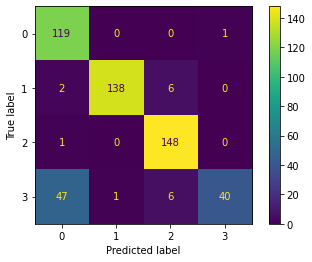

In [5]:
trial1 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB()),
])
 
classify(trial1, news.data, news.target)

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       120
           1       0.99      0.97      0.98       146
           2       0.93      1.00      0.96       149
           3       0.98      0.63      0.77        94

    accuracy                           0.92       509
   macro avg       0.93      0.90      0.90       509
weighted avg       0.93      0.92      0.91       509



Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

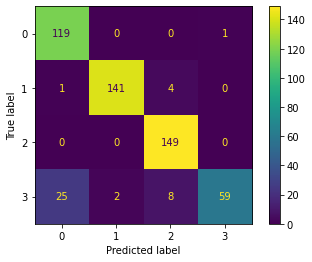

In [6]:
trial2 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB()),
])
 
classify(trial2, news.data, news.target)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       120
           1       0.99      0.98      0.99       146
           2       0.97      0.98      0.98       149
           3       0.95      0.85      0.90        94

    accuracy                           0.95       509
   macro avg       0.95      0.95      0.95       509
weighted avg       0.96      0.95      0.95       509



Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('classifier', MultinomialNB(alpha=0.05))])

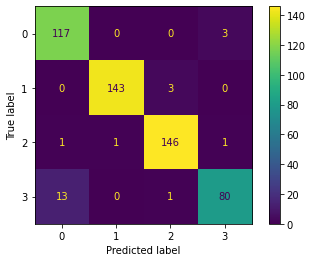

In [7]:
trial3 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
classify(trial3, news.data, news.target)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       120
           1       0.97      0.99      0.98       146
           2       0.98      0.97      0.97       149
           3       0.89      0.83      0.86        94

    accuracy                           0.94       509
   macro avg       0.93      0.93      0.93       509
weighted avg       0.94      0.94      0.94       509



Pipeline(steps=[('vectorizer', TfidfVectorizer(min_df=5, stop_words='english')),
                ('classifier', MultinomialNB(alpha=0.05))])

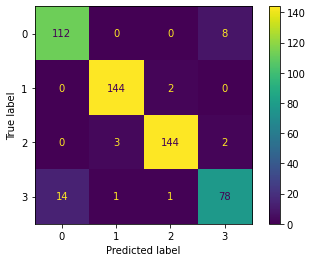

In [8]:
trial4 = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english',min_df=5)),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
classify(trial4, news.data, news.target)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       120
           1       1.00      0.97      0.99       146
           2       0.97      0.99      0.98       149
           3       0.93      0.83      0.88        94

    accuracy                           0.95       509
   macro avg       0.94      0.94      0.94       509
weighted avg       0.95      0.95      0.95       509



Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<function stemming_tokenizer at 0x7faacd6940d0>)),
                ('classifier', MultinomialNB(alpha=0.05))])

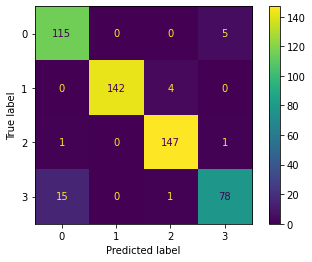

In [9]:
def stemming_tokenizer(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in word_tokenize(text)]
 
trial5 = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=stemming_tokenizer,
                             stop_words=stopwords.words('english') + list(string.punctuation))),
    ('classifier', MultinomialNB(alpha=0.05)),
])
 
classify(trial5, news.data, news.target)